In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 5)

# 1. Exploratory Data Analysis

We start every analysis by importing our datasets

## 1.1 Importing data

In [2]:
household = pd.read_csv('data/Household.csv', sep=';')
person = pd.read_csv('data/Person.csv', sep=';')
stage = pd.read_csv('data/Stage.csv', sep=';')
trip = pd.read_csv('data/Trip.csv', sep=';')

In [3]:
# Printing first 5 lines of the dataframe
person.head(5)

,person_id,household_id,age,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
0,1,3,60 to 69 years old,Male,Incomplete lower-secondary/middle school,Retired,Yes,Other impairments,Not applicable,Not applicable,35.6286
1,2,3,50 to 59 years old,Female,Incomplete lower-secondary/middle school,Other,No,Not disabled,Not applicable,Not applicable,35.6286
2,3,4,40 to 49 years old,Male,Incomplete lower-secondary/middle school,Self-employed (professional),Yes,Not disabled,Not applicable,Not applicable,32.6147
3,4,4,18 to 19 years old,Female,Incomplete undergraduate school,Student (regular courses),Yes,Not disabled,Not applicable,Not applicable,32.6147
4,5,4,10 to 14 years old,Male,Incomplete lower-secondary/middle school,Student (regular courses),No,Not disabled,Not applicable,Not applicable,32.6147


In [4]:
# Returning the shape (rows, columns) of the Dataframe
person.shape

(61358, 11)

## 1.2 Filtering data

In [5]:
# Returning the instance with index(row)=3
person.loc[3]

person_id                               4
household_id                            4
                                ...      
sector_if_civil_servant    Not applicable
expf_person                       32.6147
Name: 3, Length: 11, dtype: object

In [6]:
# Returning the four first instances (row indices 0-3)
person.loc[0:3]

,person_id,household_id,age,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
0,1,3,60 to 69 years old,Male,Incomplete lower-secondary/middle school,Retired,Yes,Other impairments,Not applicable,Not applicable,35.6286
1,2,3,50 to 59 years old,Female,Incomplete lower-secondary/middle school,Other,No,Not disabled,Not applicable,Not applicable,35.6286
2,3,4,40 to 49 years old,Male,Incomplete lower-secondary/middle school,Self-employed (professional),Yes,Not disabled,Not applicable,Not applicable,32.6147
3,4,4,18 to 19 years old,Female,Incomplete undergraduate school,Student (regular courses),Yes,Not disabled,Not applicable,Not applicable,32.6147


In [7]:
# Filtering per column value (1st option)
person[person['area_of_occupation']=='Retired']

,person_id,household_id,age,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
0,1,3,60 to 69 years old,Male,Incomplete lower-secondary/middle school,Retired,Yes,Other impairments,Not applicable,Not applicable,35.6286
14,21,37,60 to 69 years old,Female,Complete upper-secondary/high school,Retired,No,Permanent physical difficulty to walk or to cl...,Not applicable,Not applicable,51.0876
...,...,...,...,...,...,...,...,...,...,...,...
61355,74844,345423,70 to 79 years old,Female,Complete undergraduate school,Retired,No,Not disabled,Not applicable,Not applicable,33.4953
61357,74846,345424,More than 80 years old,Male,Complete graduate school,Retired,Yes,Not disabled,Not applicable,Not applicable,35.2705


In [8]:
# Filtering per column value (2nd option)
person.query('area_of_occupation=="Retired"')

,person_id,household_id,age,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
0,1,3,60 to 69 years old,Male,Incomplete lower-secondary/middle school,Retired,Yes,Other impairments,Not applicable,Not applicable,35.6286
14,21,37,60 to 69 years old,Female,Complete upper-secondary/high school,Retired,No,Permanent physical difficulty to walk or to cl...,Not applicable,Not applicable,51.0876
...,...,...,...,...,...,...,...,...,...,...,...
61355,74844,345423,70 to 79 years old,Female,Complete undergraduate school,Retired,No,Not disabled,Not applicable,Not applicable,33.4953
61357,74846,345424,More than 80 years old,Male,Complete graduate school,Retired,Yes,Not disabled,Not applicable,Not applicable,35.2705


In [9]:
# Verifying which individual values are null
person.isnull()

,person_id,household_id,age,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
61356,False,False,False,False,False,False,False,False,False,False,False
61357,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Counting the number of null values
person.isnull().sum()

person_id                    0
household_id                 0
                          ... 
sector_if_civil_servant    286
expf_person                  0
Length: 11, dtype: int64

In [11]:
# Filtering only rows where any of the columns are null
person[person.isnull().any(axis=1)]

,person_id,household_id,age,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
89,113,141,NaN,Female,NaN,Other,NaN,Not disabled,Not applicable,Not applicable,61.5311
99,133,213,70 to 79 years old,Female,NaN,Retired,No,Not disabled,Not applicable,Not applicable,41.4124
...,...,...,...,...,...,...,...,...,...,...,...
61145,74610,345147,25 to 29 years old,Female,Complete upper-secondary/high school,Private worker,Yes,Not disabled,NaN,Not applicable,45.3797
61212,74693,345264,10 to 14 years old,Male,Incomplete lower-secondary/middle school,Student (regular courses),NaN,Not disabled,Not applicable,Not applicable,33.8846


In [12]:
# Filling the null values in 'age' with the most common value of this column
person.age = person.age.fillna(person.age.mode()[0])
person.isnull().sum()

person_id                    0
household_id                 0
                          ... 
sector_if_civil_servant    286
expf_person                  0
Length: 11, dtype: int64

In [13]:
# Dropping all columns with null values
person.dropna(axis=0)

,person_id,household_id,age,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
0,1,3,60 to 69 years old,Male,Incomplete lower-secondary/middle school,Retired,Yes,Other impairments,Not applicable,Not applicable,35.6286
1,2,3,50 to 59 years old,Female,Incomplete lower-secondary/middle school,Other,No,Not disabled,Not applicable,Not applicable,35.6286
...,...,...,...,...,...,...,...,...,...,...,...
61356,74845,345423,30 to 39 years old,Male,Complete undergraduate school,Civil servent,Yes,Not disabled,Not applicable,Federal Civil Service,33.4953
61357,74846,345424,More than 80 years old,Male,Complete graduate school,Retired,Yes,Not disabled,Not applicable,Not applicable,35.2705


## 1.3 Exploring data

In [14]:
household.head(5)

,household_id,people_in_household,bathrooms,bedrooms,vehicles,bicycles,motorcycles,dwelling_type,income,household_tenure,piped_water_supply,street_pavement,private_parking_space,year_of_newest_vehicle,domestic_worker,cable_tv,social_assistence,expf_household,macrozone,administrative_region
0,3,2,2,2,1,0,0,Brickwork house,"More than R$ 4,400 and less than R$ 8,800",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,1995 to 1999,No domestic workers,Available,No,36.9016,315,Taguatinga
1,4,4,1,3,3,0,0,Brickwork house,"More than R$ 1,760 and less than R$ 2,640",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2005 to 2009,No domestic workers,Available,No,33.7800,315,Taguatinga
2,7,3,2,3,1,0,0,Brickwork house,"More than R$ 2,640 and less than R$ 4,400",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,NaN,No domestic workers,Available,No,37.1846,315,Taguatinga
3,22,3,4,4,2,0,0,Brickwork house,"More than R$ 4,400 and less than R$ 8,800",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2014 or newer,No domestic workers,Available,No,37.2258,315,Taguatinga
4,35,3,2,3,1,1,0,Apartment,"More than R$ 8,800 and less than R$ 13,200",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2010 to 2013,No domestic workers,Available,No,68.3503,222,Guará


In [15]:
# Quickly calculating statistical summary for numerical columns
household.describe()

,household_id,people_in_household,bathrooms,bedrooms,vehicles,bicycles,motorcycles,expf_household,macrozone
count,19252.000000,19252.000000,19252.000000,19252.000000,19252.000000,19252.000000,19252.000000,19252.000000,19252.000000
mean,132270.295761,3.187097,1.938188,2.632298,1.006389,0.637752,0.092302,49.393745,348.272283
...,...,...,...,...,...,...,...,...,...
75%,229269.250000,4.000000,2.000000,3.000000,1.000000,1.000000,0.000000,57.781300,422.000000
max,345424.000000,13.000000,303.000000,311.000000,10.000000,11.000000,20.000000,99.649100,626.000000


In [16]:
# Get the mean number of vehicles in each household:
print("The average number of vehicles in each household is: " + str(household['vehicles'].mean()))

print("The most common value of income per household is: "+ str(household['income'].mode()[0]))

The average number of vehicles in each household is: 1.0063889466029503
The most common value of income per household is: More than R$ 880 and less than R$ 1,760


In [17]:
# Filter the dataframe to get the households where there are 2 or more vehicles
household[household.vehicles >=2]

,household_id,people_in_household,bathrooms,bedrooms,vehicles,bicycles,motorcycles,dwelling_type,income,household_tenure,piped_water_supply,street_pavement,private_parking_space,year_of_newest_vehicle,domestic_worker,cable_tv,social_assistence,expf_household,macrozone,administrative_region
1,4,4,1,3,3,0,0,Brickwork house,"More than R$ 1,760 and less than R$ 2,640",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2005 to 2009,No domestic workers,Available,No,33.7800,315,Taguatinga
3,22,3,4,4,2,0,0,Brickwork house,"More than R$ 4,400 and less than R$ 8,800",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2014 or newer,No domestic workers,Available,No,37.2258,315,Taguatinga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19247,345420,4,3,4,4,0,0,Brickwork house,"More than R$ 13,200 and less than R$ 17,600",Owned,"Yes, but only connected to a tap outside of th...","Asphalt, concrete",Available,2014 or newer,"Yes, regular",Available,No,41.2053,532,Lago Sul
19248,345421,6,3,4,3,2,0,Brickwork house,"More than R$ 13,200 and less than R$ 17,600",Owned,"Yes, but only connected to a tap outside of th...","Asphalt, concrete",Available,2014 or newer,"Yes, occasional",Not available,No,65.3006,532,Lago Sul


In [18]:
# Discover the most common income value for these households:
# Filter the dataframe to get the households where there are 2 or more vehicles
household[household.vehicles >=2].income.mode()[0]

'More than R$ 4,400 and less than R$ 8,800'

In [19]:
# Create a column to check if there are many vehicles in the household or not
check_many_cars = pd.Series(household['vehicles']>=2)
household = pd.concat([household, check_many_cars.rename('are_many_cars')], axis=1)
household.head(3)

,household_id,people_in_household,bathrooms,bedrooms,vehicles,bicycles,motorcycles,dwelling_type,income,household_tenure,piped_water_supply,street_pavement,private_parking_space,year_of_newest_vehicle,domestic_worker,cable_tv,social_assistence,expf_household,macrozone,administrative_region,are_many_cars
0,3,2,2,2,1,0,0,Brickwork house,"More than R$ 4,400 and less than R$ 8,800",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,1995 to 1999,No domestic workers,Available,No,36.9016,315,Taguatinga,False
1,4,4,1,3,3,0,0,Brickwork house,"More than R$ 1,760 and less than R$ 2,640",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2005 to 2009,No domestic workers,Available,No,33.7800,315,Taguatinga,True
2,7,3,2,3,1,0,0,Brickwork house,"More than R$ 2,640 and less than R$ 4,400",Owned,"Yes, available at least in one room","Asphalt, concrete",Available,NaN,No domestic workers,Available,No,37.1846,315,Taguatinga,False


In [20]:
# Grouping by this new column
print(household.groupby(household.are_many_cars).household_id.count())

are_many_cars
False    14454
True      4798
Name: household_id, dtype: int64


## 1.4 Visualizing data

In [49]:
age_counts = person['age'].value_counts()
age_counts

30 to 39 years old        10172
40 to 49 years old         8620
                          ...  
18 to 19 years old         2287
More than 80 years old     1029
Name: age, Length: 13, dtype: int64

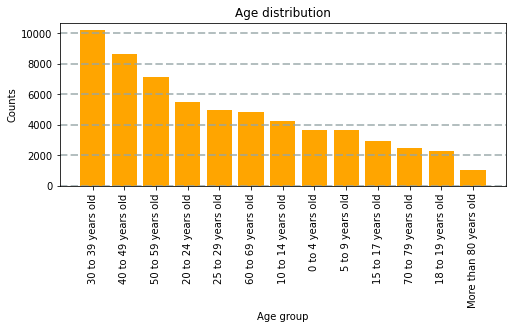

In [45]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=age_counts.index.tolist(), height=age_counts, color='orange')

# Customize the chart
plt.title('Age distribution')
plt.xlabel('Age group')
plt.ylabel('Counts')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

## 1.5 Performing statistical analysis

In [55]:
map_age = {'0 to 4 years old': 1,
           '5 to 9 years old': 2,
           '10 to 14 years old': 3,
           '15 to 17 years old': 4,
           '18 to 19 years old': 5,
           '20 to 24 years old': 6,
           '25 to 29 years old': 7,
           '30 to 39 years old': 8,
           '40 to 49 years old': 9,
           '50 to 59 years old': 10,
           '60 to 69 years old': 11,
           '70 to 79 years old': 12,
           'More than 80 years old': 13}

person.age = person.age.map(map_age)

person.rename(columns={'age':'age_group'}, inplace=True)

person.head()

,person_id,household_id,age_group,gender,education_level,area_of_occupation,has_driver_license,is_disabled,sector_if_private_worker,sector_if_civil_servant,expf_person
0,1,3,11,Male,Incomplete lower-secondary/middle school,Retired,Yes,Other impairments,Not applicable,Not applicable,35.6286
1,2,3,10,Female,Incomplete lower-secondary/middle school,Other,No,Not disabled,Not applicable,Not applicable,35.6286
2,3,4,9,Male,Incomplete lower-secondary/middle school,Self-employed (professional),Yes,Not disabled,Not applicable,Not applicable,32.6147
3,4,4,5,Female,Incomplete undergraduate school,Student (regular courses),Yes,Not disabled,Not applicable,Not applicable,32.6147
4,5,4,3,Male,Incomplete lower-secondary/middle school,Student (regular courses),No,Not disabled,Not applicable,Not applicable,32.6147


/home/daniele/Documents/my-data-science-notebook/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


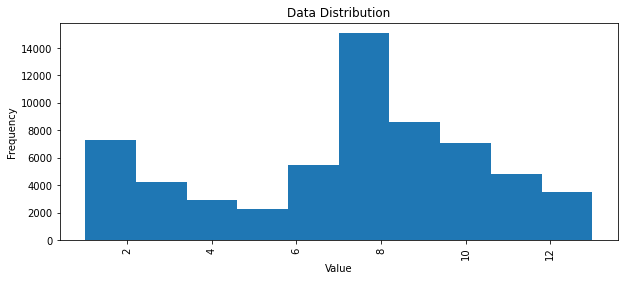

In [57]:
# Get the variable to examine
var_data = person['age_group']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)
plt.xticks(rotation=90)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

In [58]:
household.income.unique()

array(['More than R$ 4,400 and less than R$ 8,800',
       'More than R$ 1,760 and less than R$ 2,640',
       'More than R$ 2,640 and less than R$ 4,400',
       'More than R$ 8,800 and less than R$ 13,200',
       'More than R$ 440 and less than R$ 880',
       'More than R$ 880 and less than R$ 1,760',
       'More than R$ 13,200 and less than R$ 17,600', nan,
       'Has no income', 'More than R$ 22,000 and less than R$ 26,400',
       'R$ 440 or less', 'More than R$ 17,600 and less than R$ 22,000',
       'More than R$ 26,400'], dtype=object)

In [59]:
map_income = {'Has no income':0,
              'R$ 440 or less':1, 
              'More than R$ 440 and less than R$ 880':2, 
              'More than R$ 880 and less than R$ 1,760':3, 
              'More than R$ 1,760 and less than R$ 2,640':4,
              'More than R$ 2,640 and less than R$ 4,400':5, 
              'More than R$ 4,400 and less than R$ 8,800':6, 
              'More than R$ 8,800 and less than R$ 13,200':7, 
              'More than R$ 13,200 and less than R$ 17,600':8, 
              'More than R$ 17,600 and less than R$ 22,000':9, 
              'More than R$ 22,000 and less than R$ 26,400':10, 
              'More than R$ 26,400':11}

household.income = household.income.map(map_income)

household.head()

,household_id,people_in_household,bathrooms,bedrooms,vehicles,bicycles,motorcycles,dwelling_type,income,household_tenure,piped_water_supply,street_pavement,private_parking_space,year_of_newest_vehicle,domestic_worker,cable_tv,social_assistence,expf_household,macrozone,administrative_region,are_many_cars
0,3,2,2,2,1,0,0,Brickwork house,6.0,Owned,"Yes, available at least in one room","Asphalt, concrete",Available,1995 to 1999,No domestic workers,Available,No,36.9016,315,Taguatinga,False
1,4,4,1,3,3,0,0,Brickwork house,4.0,Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2005 to 2009,No domestic workers,Available,No,33.7800,315,Taguatinga,True
2,7,3,2,3,1,0,0,Brickwork house,5.0,Owned,"Yes, available at least in one room","Asphalt, concrete",Available,NaN,No domestic workers,Available,No,37.1846,315,Taguatinga,False
3,22,3,4,4,2,0,0,Brickwork house,6.0,Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2014 or newer,No domestic workers,Available,No,37.2258,315,Taguatinga,True
4,35,3,2,3,1,1,0,Apartment,7.0,Owned,"Yes, available at least in one room","Asphalt, concrete",Available,2010 to 2013,No domestic workers,Available,No,68.3503,222,Guará,False


Minimum:0.00
Mean (cyan):4.66
Median (red):4.00
Mode (yellow):3.00
Maximum:11.00

/home/daniele/Documents/my-data-science-notebook/venv/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


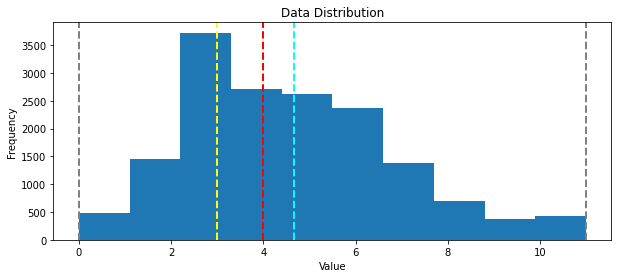

In [67]:
# Get the variable to examine
var = household['income']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum: {:.2f}\nMean (cyan): {:.2f}\nMedian (red): {:.2f}\nMode (yellow): {:.2f}\nMaximum: {:.2f}\n'.format(min_val,
                                                                                                                    mean_val,
                                                                                                                    med_val,
                                                                                                                    mod_val,
                                                                                                                    max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()

/home/daniele/Documents/my-data-science-notebook/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


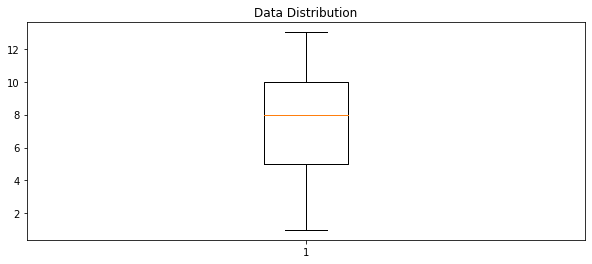

In [65]:
# Get the variable to examine
var = person['age_group']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
fig.show()

Minimum: 1.00
Mean (cyan): 7.17
Median (red): 8.00
Mode (yellow): 8.00
Maximum: 13.00

/home/daniele/Documents/my-data-science-notebook/venv/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


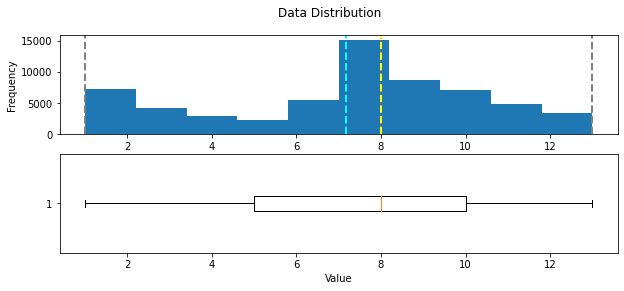

In [69]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum: {:.2f}\nMean (cyan): {:.2f}\nMedian (red): {:.2f}\nMode (yellow): {:.2f}\nMaximum: {:.2f}\n'.format(min_val,
                                                                                                                    mean_val,
                                                                                                                    med_val,
                                                                                                                    mod_val,
                                                                                                                    max_val))


    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = person["age_group"]
# Call the function
show_distribution(col)